# Electricty Forecast Research

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

## Dataset of Average Power Consumption (MW) per 30-minute interval in France. 

In [15]:
df=pd.read_csv('FranceElec.csv', delimiter=';')
print('No. of rows and columns:', df.shape)
df.head(5)

No. of rows and columns: (173856, 5)


,Date - Heure,Date,Hour,Consumption,Quality
0,2009-06-05T21:00:00-07:00,2009-06-06,06:00,35984,Définitive
1,2009-06-06T00:00:00-07:00,2009-06-06,09:00,43188,Définitive
2,2009-06-06T02:30:00-07:00,2009-06-06,11:30,46959,Définitive
3,2009-06-06T03:30:00-07:00,2009-06-06,12:30,48622,Définitive
4,2009-06-06T11:30:00-07:00,2009-06-06,20:30,42578,Définitive


In [17]:
df.Quality.unique()

array(['Définitive', 'Intermédiaire'], dtype=object)

In [21]:
df.dtypes

Date - Heure            object
Date                    object
Hour                    object
Consumption              int64
Quality                 object
Time            datetime64[ns]
year                     int64
quarter                  int64
month                    int64
day                      int64
dtype: object

### Check Missing Values

In [19]:
df.isnull().sum()

Date - Heure    0
Date            0
Hour            0
Consumption     0
Quality         0
dtype: int64

No missing Values in the dataset

#### Convert Time into Date Time Index and Create Year, Quarter, Month and Day

In [20]:
df['Time']=pd.to_datetime(df['Date - Heure']) 
#DatetimeIndex, which is a pandas index that is optimized to index data with dates and times.
df['year'] = df['Time'].apply(lambda x: x.year)
df['quarter'] = df['Time'].apply(lambda x: x.quarter)
df['month'] = df['Time'].apply(lambda x: x.month)
df['day'] = df['Time'].apply(lambda x: x.day)

In [24]:
df=df[df.Quality=='Définitive']
df=df[(df.year>2007) & (df.year<2017)]
df=df.loc[:,['Time','Consumption', 'year','quarter','month','day']]
df.sort_values('Time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["Time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print(df.shape)
print(df.Time.min())
print(df.Time.max())
df.tail(3)

(157822, 7)
2008-01-01 00:00:00
2016-12-31 22:30:00


,Time,Consumption,year,quarter,month,day,weekday
157819,2016-12-31 21:30:00,71924,2016,4,12,31,0
157820,2016-12-31 22:00:00,75424,2016,4,12,31,0
157821,2016-12-31 22:30:00,75504,2016,4,12,31,0


## Basics Statistics

In [25]:
df.Consumption.describe()

count   157822.00
mean     55218.38
std      12101.42
min      29477.00
25%      46002.00
50%      53688.00
75%      63558.75
max     101866.00
Name: Consumption, dtype: float64

## Time Series Plot

In [26]:
df1=df.loc[:,['Time','Consumption']]
#df1['Time'] = df['Time'].apply(lambda x: x.date())
#df1['Time']=pd.to_datetime(df1['Time'])
df1.set_index('Time',inplace=True);

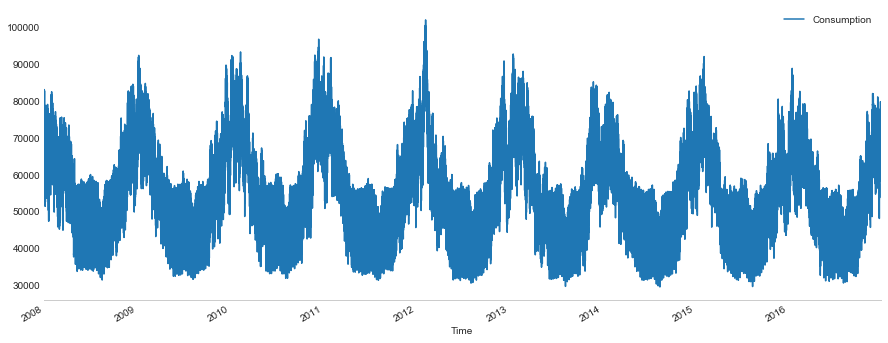

In [29]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(15,6));
df1.plot(figsize=(15, 6));
sns.despine(left=True);
plt.show();

## Electricty Consumption Distribution

,count,mean,std,min,25%,50%,75%,max
Consumption,157822.00,55218.38,12101.42,29477.00,46002.00,53688.00,63558.75,101866.00


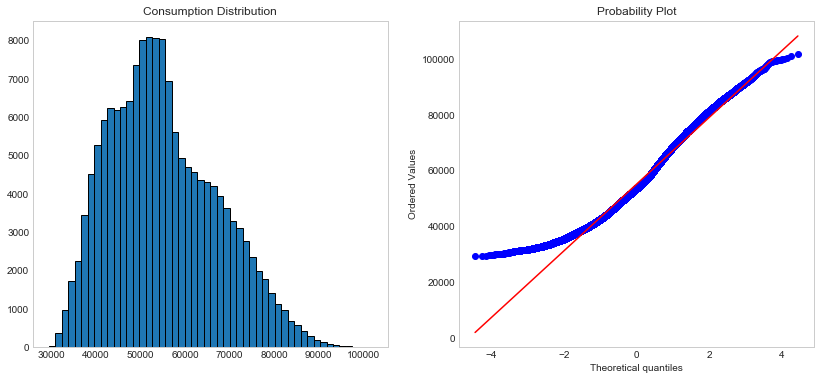

In [30]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Consumption'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Consumption Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Consumption'], plot=plt);
#print("Skewness: %f" % df['Consumption'].skew())
#print("Kurtosis: %f" % df['Consumption'].kurt())
df1.describe().transpose()

Normal probability plot shows the data set is approximately normally distributed. 

### Consumption by Year, Quarter, Month and Day

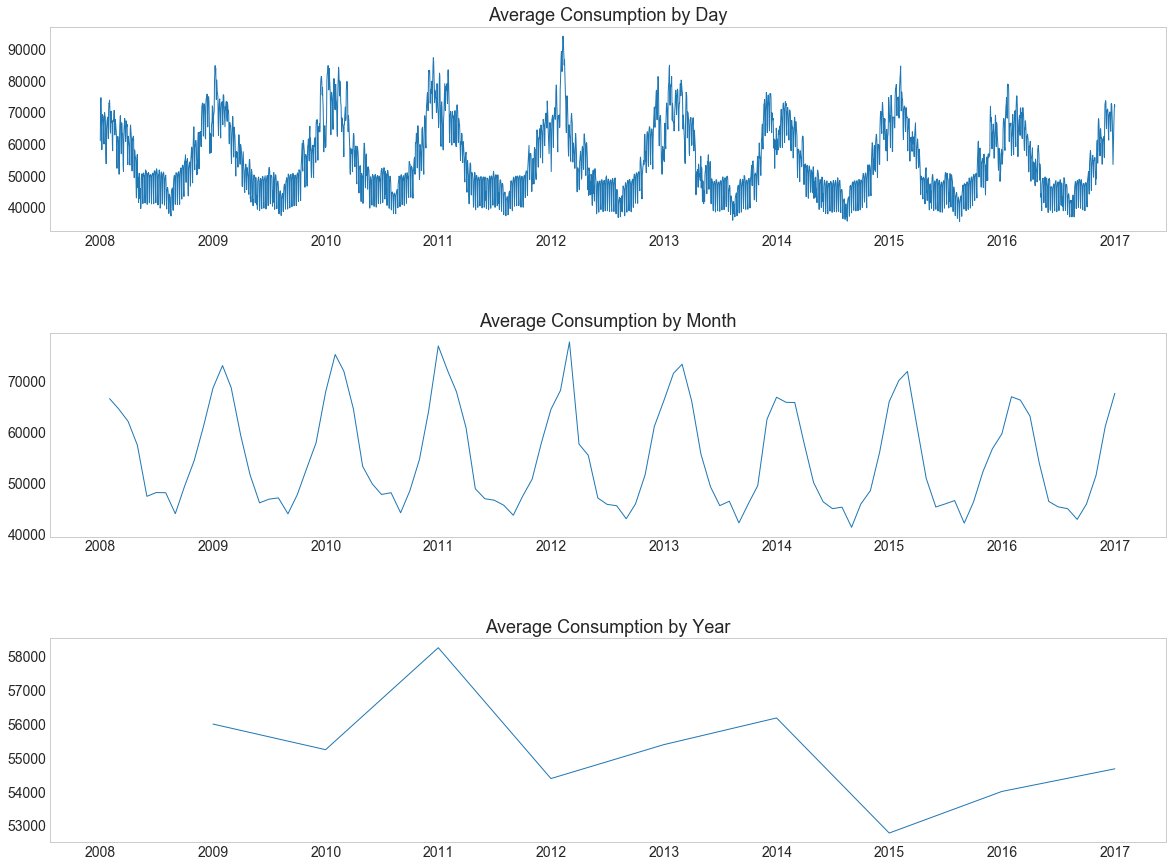

In [31]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df1['Consumption'].resample('D').mean(),linewidth=1)
ax1.set_title('Average Consumption by Day', fontsize=18)
#ax1.set_ylabel('Average Consumption', fontsize=14)
#ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df1['Consumption'].resample('M').mean(),linewidth=1)
ax2.set_title('Average Consumption by Month', fontsize=18)
#ax2.set_ylabel('# of Crimes', fontsize=14)
#ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df1['Consumption'].resample('A').mean(),linewidth=1)
ax3.set_title('Average Consumption by Year', fontsize=18)
#ax3.set_ylabel('# of Crimes', fontsize=14)
#ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

The time series has no general trend,upward or downward. The regression or trend line can then not be used as a prediction of the long run movement of the time series. 

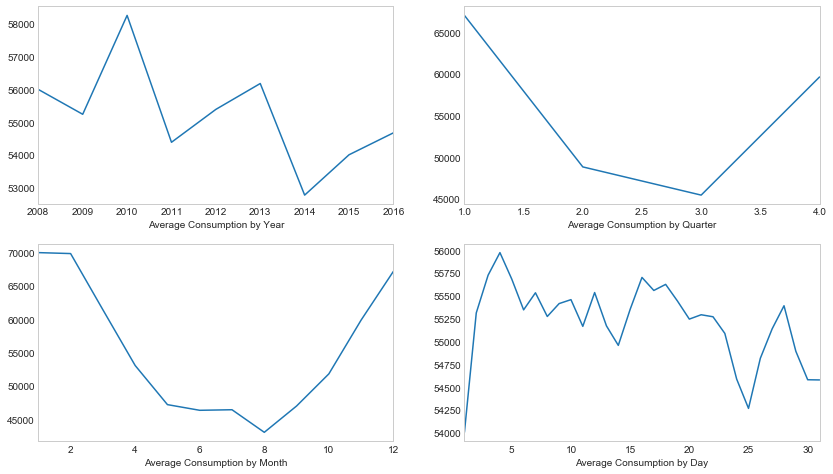

In [32]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').Consumption.agg('mean').plot();
plt.xlabel('Average Consumption by Year')

plt.subplot(2,2,2)
df.groupby('quarter').Consumption.agg('mean').plot();
plt.xlabel('Average Consumption by Quarter')

plt.subplot(2,2,3)
df.groupby('month').Consumption.agg('mean').plot();
plt.xlabel('Average Consumption by Month')

plt.subplot(2,2,4)
df.groupby('day').Consumption.agg('mean').plot();
plt.xlabel('Average Consumption by Day');

## Consumption by Years (2008-2016)

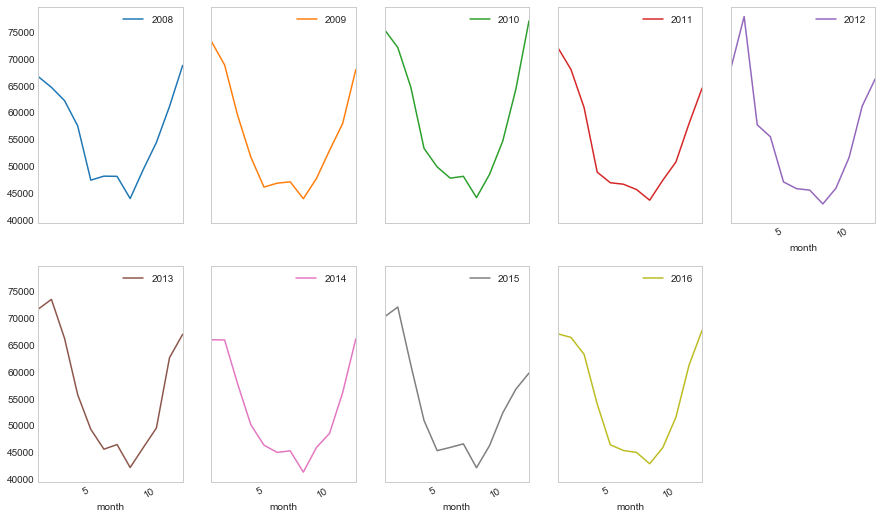

In [33]:
dfPivot = pd.pivot_table(df, values = "Consumption", 
                             columns = "year", index = "month")

dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True);

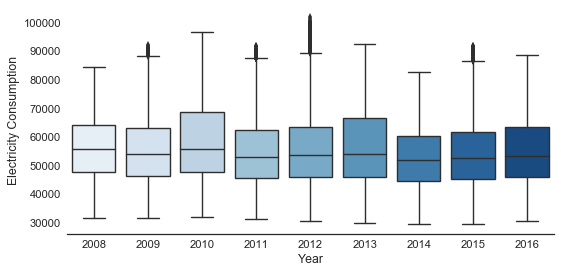

In [34]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.4)  
a=plt.figure(figsize=(8,4))

sns.boxplot(x="year", y="Consumption", data=df, palette='Blues');
plt.xlabel('Year')
plt.ylabel('Electricity Consumption')
sns.despine(left=True);
plt.tight_layout() 

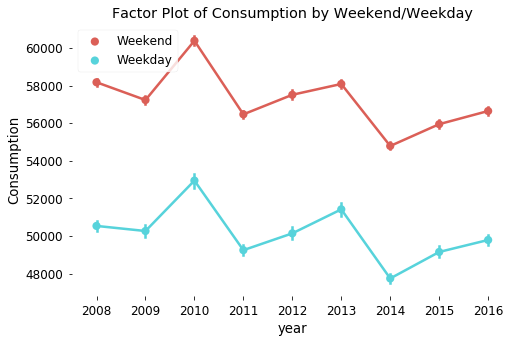

In [6]:
dic={0:'Weekday',1:'Weekend'}
df['Day'] = df.weekday.map(dic)


sns.set_context("paper", font_scale=1.5)  

plt1=sns.factorplot('year','Consumption',hue='Day',
                    data=df, size=5,palette='hls', aspect=1.5, legend=False);                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Consumption by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper left');

** ANALYSIS**

Untrendted Seasonal Time Series

## Moving Averages for Year 2008 and 2016

10 & 20 Points

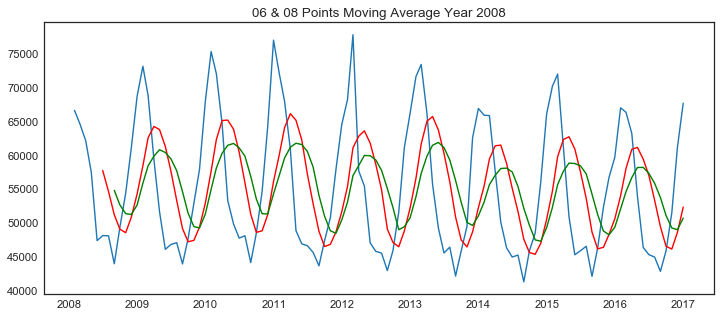

In [35]:
plt.figure(figsize=(12,5))
dfall=df1.resample('M', how=np.mean)
#dfall=dfall[dfall.index>'2010-12-31']
moving_avg = pd.rolling_mean(dfall,6)
moving_avg1 = pd.rolling_mean(dfall,8)
plt.plot(dfall)
plt.plot(moving_avg, color='red');
plt.plot(moving_avg1, color='green');
plt.title('06 & 08 Points Moving Average Year 2008');

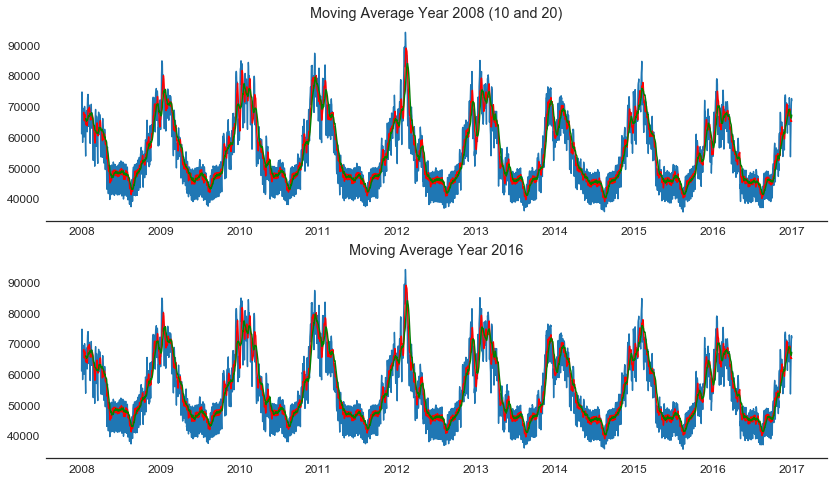

In [38]:
df08=df1.resample('D', how=np.mean)
df16=df1.resample('D', how=np.mean)

sns.set_context("paper", font_scale=1.5)  
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
moving_avg = pd.rolling_mean(df08,10)
moving_avg1 = pd.rolling_mean(df08,20)
plt.plot(df08)
sns.despine(left=True)
plt.plot(moving_avg, color='red');
plt.plot(moving_avg1, color='green');
plt.title('Moving Average Year 2008 (10 and 20)')

plt.subplot(2,1,2)
moving_avg = pd.rolling_mean(df16,10)
moving_avg1 = pd.rolling_mean(df16,20)
plt.plot(df16)
sns.despine(left=True)
plt.plot(moving_avg, color='red');
plt.plot(moving_avg1, color='green');
plt.title('Moving Average Year 2016');

## Time Series Decomposition. 
### Downsampled to Day for Visualization
Time Series Decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

Text(0.5,1,'Residual')

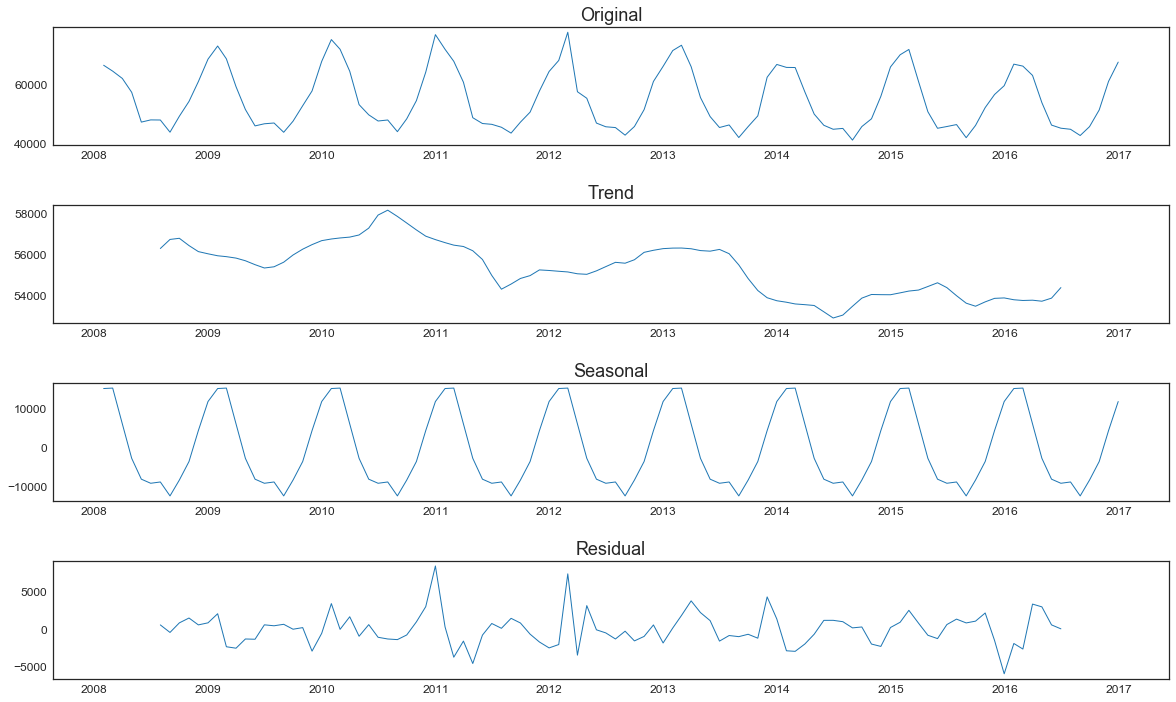

In [39]:
df2 = df1['Consumption'].resample('M').mean().to_frame()

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df2.Consumption)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(4,1,1)
ax1.plot(df2,linewidth=1)
ax1.set_title('Original', fontsize=18)

ax2 = fig.add_subplot(4,1,2, sharex=ax1)
ax2.plot(trend,linewidth=1)
ax2.set_title('Trend', fontsize=18)

ax3  = fig.add_subplot(4,1,3, sharex=ax1)
ax3.plot(seasonal,linewidth=1)
ax3.set_title('Seasonal', fontsize=18)

ax4  = fig.add_subplot(4,1,4, sharex=ax1)
ax4.plot(residual,linewidth=1)
ax4.set_title('Residual', fontsize=18)

The residual mean for every quarter is different and data exhibits seasonailty

##  Dickey-Fuller Test to check Stationarity

Stationary series has constant mean and variance over time. Rolling average and the rolling standard deviation of time series do not change over time. 

### Dickey-Fuller test

Null Hypothesis (H0): It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [40]:
df2=df1.resample('D', how=np.mean)

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

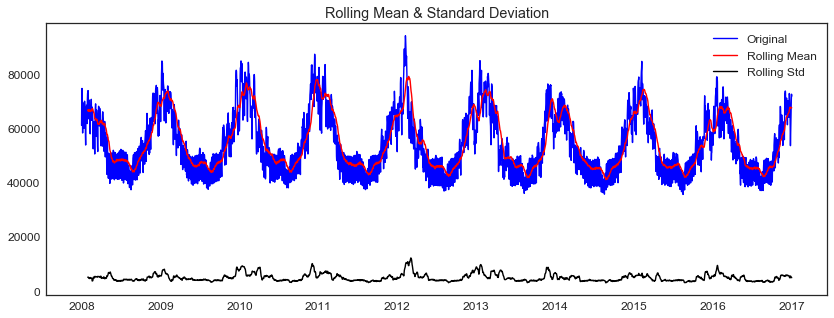

<Results of Dickey-Fuller Test>
Test Statistic                  -4.20
p-value                          0.00
#Lags Used                      28.00
Number of Observations Used   3259.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [41]:
test_stationarity(df2.Consumption)

Reject the null hypothesis H0, the data does not have a unit root and is stationary.
Our data is now below our 10% critical value, but can be further improved.

The test results comprise of a test statistic and some critical values for different confidence levels. If the 'test statistic’ is less than the ‘critical value’, we can reject the null hypothesis and say that the series is stationary.

## Checking Autocorrelation
A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, ACF, correlogram or an autocorrelation plot.

AttributeError: module 'statsmodels.graphics' has no attribute 'tsa'

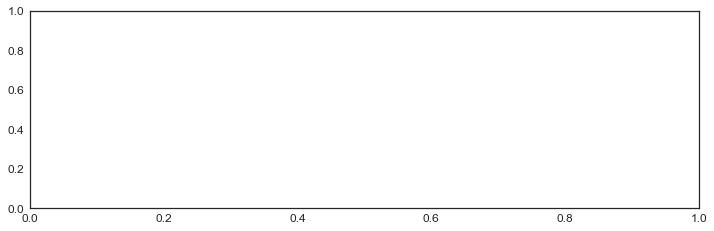

In [42]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import *
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.iloc[0:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.iloc[13:], lags=70, ax=ax2)

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
In ACF plot, with large lags the correlation does not decay to zero

## Durbin Watson Statistic
This returns a number between 0 and 4, where 0 depicts strong positive autocorrelation, 04 depeicts strong negative correlation and 02 depicts no correlation

In [ ]:
sm.stats.durbin_watson(df1.Consumption)

## Log Transformation and First Difference

In [ ]:
#df2 = df1['Consumption'].resample('D').mean().to_frame()
tslog=np.log(df1)
tslog = tslog - tslog.shift(1)
tslog.dropna(inplace=True)
plt.plot(tslog.iloc[0:40000,:]);

Post Dickey-Fuller Test 

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#df1diff.head()
tslog.dropna(inplace=True)
test_stationarity(tslog.Consumption)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tslog.iloc[13:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tslog.iloc[13:], lags=100, ax=ax2)

# Weather Data

In [45]:
dfw.head(1)

,tstp,outdoor_humidity,outdoor_temperature,wind_speed
0,6/6/2007 14:30,62.56,22.97,17.07


In [46]:
dfw=pd.read_csv('weatherFrance.csv')
dfw.head()
print(dfw.shape)

(179481, 4)


In [47]:
list_df=[]
dfw["Time"]=pd.to_datetime(dfw["Time"])
dfw["wind_speed"]=pd.to_numeric(dfw["wind_speed"],errors="coerce")
dfw=dfw[(dfw["wind_speed"]<200) & (dfw["wind_speed"]>0)]
dfw=dfw[(dfw["temperature"]>-20) & (dfw["temperature"]<50)]
dfw=dfw[(dfw["humidity"]>0) & (dfw["humidity"]<100)]

dfw=dfw[["Time","temperature","humidity","wind_speed"]].set_index(["Time"])
for param in ["temperature","humidity","wind_speed"]:
    print(param)
    list_df.append(dfw[[param]].resample('30T').interpolate(method='linear'))
dfw=pd.concat(list_df,axis=1).reset_index()
dfw.set_index ('Time', inplace=True)
dfw.head()

temperature
humidity
wind_speed


,Time,temperature,humidity,wind_speed
0,2007-06-06 14:30:00,22.97,62.56,17.07
1,2007-06-06 15:00:00,22.87,63.82,17.17
2,2007-06-06 15:30:00,22.47,64.95,17.16
3,2007-06-06 16:00:00,22.19,67.34,16.84
4,2007-06-06 16:30:00,22.17,67.24,16.93


In [51]:
df.head()

,Time,Consumption,year,quarter,month,day,weekday
0,2008-01-01 00:00:00,63949,2008,1,1,1,1
1,2008-01-01 00:30:00,64198,2008,1,1,1,1
2,2008-01-01 01:00:00,64190,2008,1,1,1,1
3,2008-01-01 01:30:00,64104,2008,1,1,1,1
4,2008-01-01 02:00:00,62182,2008,1,1,1,1


In [52]:
df0=df.loc[:,['Time','Consumption','quarter', 'month','day','weekday']]
df0.set_index('Time', inplace=True)
df0.head()

,Consumption,quarter,month,day,weekday
Time,,,,,
2008-01-01 00:00:00,63949,1,1,1,1
2008-01-01 00:30:00,64198,1,1,1,1
2008-01-01 01:00:00,64190,1,1,1,1
2008-01-01 01:30:00,64104,1,1,1,1
2008-01-01 02:00:00,62182,1,1,1,1


In [10]:
#df0=df
#df0['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.date())

In [53]:
df=dfw.join(df0,how='inner')[['Consumption', 'quarter', 'month', 'day', 'weekday', "temperature","humidity","wind_speed"]]
df.head()

,Consumption,quarter,month,day,weekday,temperature,humidity,wind_speed
Time,,,,,,,,
2008-01-01 00:00:00,63949,1,1,1,1,2.52,88.91,6.74
2008-01-01 00:30:00,64198,1,1,1,1,2.56,89.43,6.40
2008-01-01 01:00:00,64190,1,1,1,1,2.52,89.54,6.88
2008-01-01 01:30:00,64104,1,1,1,1,2.48,90.00,6.75
2008-01-01 02:00:00,62182,1,1,1,1,2.41,89.94,6.97


## Appending 10 Previous Time Lags

In [54]:
for obs in range(1,10):
    df["T_" + str(obs)] = df.Consumption.shift(obs)
    
df.fillna(0.00,inplace=True)
df.head(3)  

,Consumption,quarter,month,day,weekday,temperature,humidity,wind_speed,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
Time,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,63949,1,1,1,1,2.52,88.91,6.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-01-01 00:30:00,64198,1,1,1,1,2.56,89.43,6.40,63949.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-01-01 01:00:00,64190,1,1,1,1,2.52,89.54,6.88,64198.00,63949.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Min Max Scaling
Transforms features by caling them into range (0,1)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['temperature', 'quarter','month','day', 'humidity','wind_speed','T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9']] = scaler.fit_transform(df
                                                                                                              [['temperature', 'quarter','month','day', 'humidity',
                                                                                                                'wind_speed', 'T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9']]);

In [56]:
df.head()

,Consumption,quarter,month,day,weekday,temperature,humidity,wind_speed,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
Time,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,63949,0.00,0.00,0.00,1,0.27,0.92,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-01-01 00:30:00,64198,0.00,0.00,0.00,1,0.27,0.93,0.06,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-01-01 01:00:00,64190,0.00,0.00,0.00,1,0.27,0.93,0.08,0.63,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-01-01 01:30:00,64104,0.00,0.00,0.00,1,0.27,0.94,0.07,0.63,0.63,0.63,0.00,0.00,0.00,0.00,0.00,0.00
2008-01-01 02:00:00,62182,0.00,0.00,0.00,1,0.27,0.94,0.08,0.63,0.63,0.63,0.63,0.00,0.00,0.00,0.00,0.00


A seasonal pattern that repeats each kth period of time indicates that you should take the kth difference to remove a portion of the pattern. Most series should not require more than two difference operations or orders.

# Modeling

## Analysis of Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=False, fit_intercept=True)
trend_model.fit(np.array(df.index).reshape((-1,1)), df['Consumption'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_))

residuals = np.array(df['Consumption']) - trend_model.predict(np.array(df.index).reshape((-1,1)))
plt.figure(figsize=(14, 5.5))
pd.Series(data=residuals, index=df.index).plot(color='b')
plt.title('Residuals of trend model for Electricty Load')
plt.xlabel('Time')
plt.ylabel('Load')
plt.xticks(rotation=30)

In [ ]:
df['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
4: 'Q2', 5: 'Q2', 6: 'Q2',
7: 'Q3', 8: 'Q3', 9: 'Q3',
10: 'Q4', 11: 'Q4', 12: 'Q4'
}
df['Quarter'] = df['month'].map(lambda m: month_quarter_map.get(m))

plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=df, y='Residuals', x='Quarter')
g.set_title('Quarterly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Consumption')

The difference in mean residuals for every quarter suggests seasonality

## Train Test Split

In [61]:
df.index.max()

Timestamp('2016-12-31 22:30:00')

In [68]:
# Define training and testing periods
train_start = '2008-01-01'
train_end = '2014-06-1'
test_start = '2014-06-2'
test_end = '2016-12-31'

In [69]:
# Split up into training and testing sets (still in Pandas dataframes)

X_train = df[train_start:train_end]
del X_train['Consumption']

y_train = df['Consumption'][train_start:train_end]

X_test = df[test_start:test_end]
del X_test['Consumption']

y_test = df['Consumption'][test_start:test_end]

In [70]:
print ('Number of observations in the Training set:', len(X_train))
print ('Percentage of data in Training set:', len(X_train)/len(df)*100)
print ('Number of observations in the Test set: ', len(X_test))
print ('Percentage of data in Test set:', len(X_test)/len(df)*100)

Number of observations in the Training set: 112514
Percentage of data in Training set: 71.29170838032721
Number of observations in the Test set:  45308
Percentage of data in Test set: 28.708291619672792


In [71]:
def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Linear Regression as Bemchmark Model

In [72]:
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model.fit(X_train, y_train) #Fit object to training set
end = time()
y_pred=benchmark_model.predict(X_test)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model.score(X_test, y_test) * 100))

print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - y_pred)**2))))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %f' % mae)
mape=MAPError(y_test, y_pred)
print('MAPE: %f' % mape)

Classifier fitted in 0.19 seconds
Score on Training data : 99.41%
Score on Testing data : 99.35%
RMSE : 923.516
MAE: 674.713594
MAPE: 1.291747


### Coefficients of the Regression Model

In [73]:
pd.DataFrame(benchmark_model.coef_,X_train.columns,columns=['Coeff']).T

,quarter,month,day,weekday,temperature,humidity,wind_speed,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
Coeff,45.92,-61.36,-1.58,195.43,-1667.90,-275.37,216.67,167973.03,-59707.50,-15523.58,-8746.59,26090.90,-8106.71,-1373.07,-4912.23,3610.06


## Machine Learning Modeling

1. Ridge Regression
2. k-Nearest Neighbors
3. Random Forest Regressor
4. GradientBoostingRegresso
5. ExtraTreesRegressor
6. Neural Network

In [74]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    reg_props["MAE"] = mean_absolute_error(y_test, regressor.predict(X_test))
    reg_props["MAPE"] = MAPError(y_test, regressor.predict(X_test))
    
    return reg_props

In [75]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_test, y_test)
        props.append(properites)
        
    return props

Mean Absolute Deviation MAD: The average of the absolute values of the devition between the actual and forecast. The absolute error is the absolute value of the difference between the forecasted value and the actual value. MAE tells us how big of an error we can expect from the forecast on average.

The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. MAPE allows us to compare forecasts of different series in different scales.

In [76]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    mae_vals = [prop["MAE"] for prop in properties]
    mape_vals=[prop["MAPE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals,
                            "MAE":mae_vals,
                            "MAPE":mape_vals
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

In [77]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(y_test, benchmark_model.predict(X_test))),
        "MAE": mean_absolute_error(y_test, benchmark_model.predict(X_test)),
        "MAPE": MAPError(y_test, benchmark_model.predict(X_test)),
        "Training Scores": benchmark_model.score(X_train, y_train),
        "Testing Scores" :benchmark_model.score(X_test, y_test),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

,MAE,MAPE,RMSE,Testing Scores,Training Scores,Training Times
Ridge,697.58,1.34,943.83,0.99,0.99,0.15
KNeighborsRegressor,1743.99,3.41,2313.73,0.96,0.99,7.35
RandomForestRegressor,418.45,0.79,606.49,1.00,1.00,19.09
GradientBoostingRegressor,791.87,1.51,1082.31,0.99,0.99,18.95
MLPRegressor,1245.02,2.38,1669.86,0.98,0.98,234.73
ExtraTreesRegressor,376.61,0.71,546.56,1.00,1.00,5.48
Linear Regression (Benchmark),674.71,1.29,923.52,0.99,0.99,0.19


## Performance Plots of Models

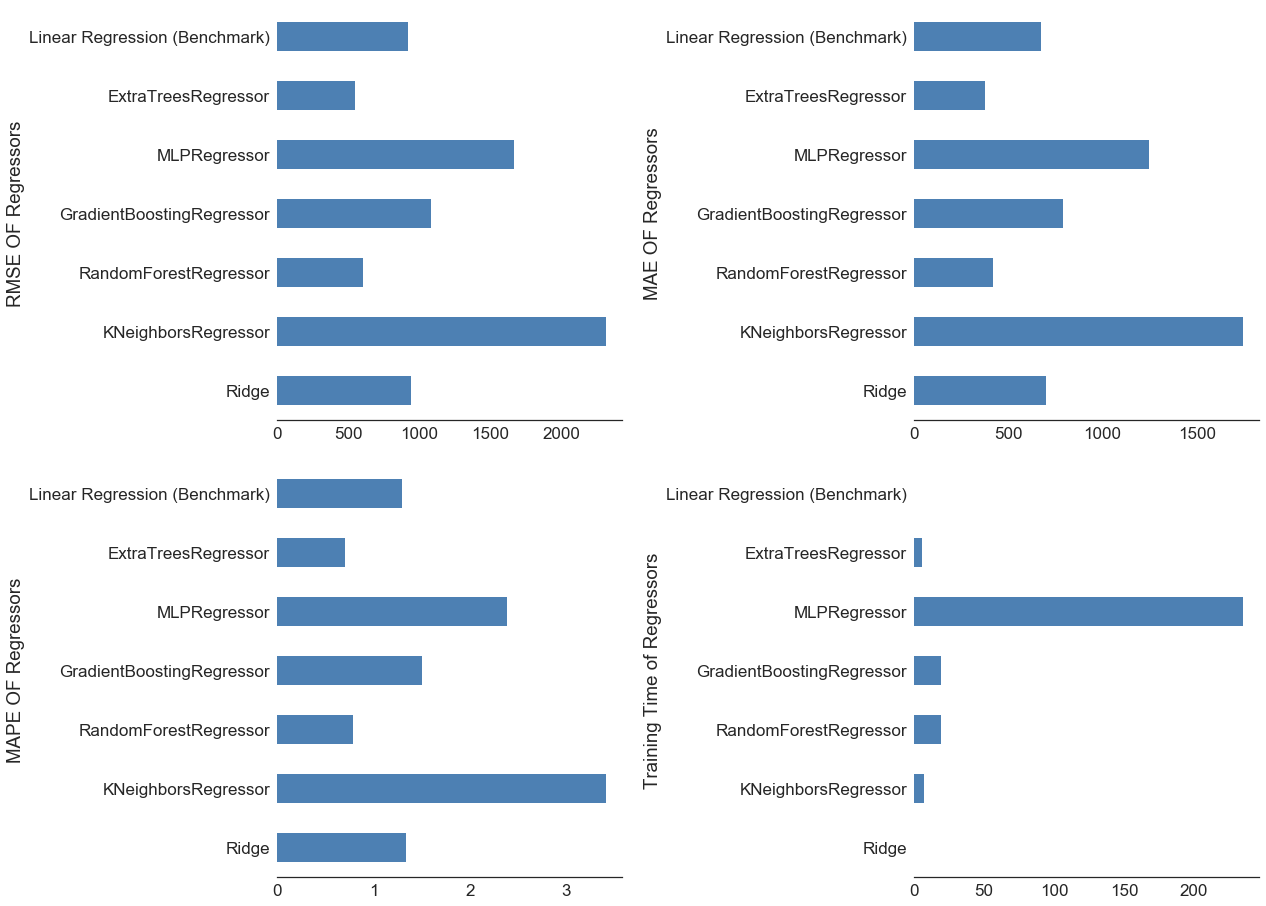

In [82]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))
plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("MAPE OF Regressors")
properties["MAPE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

## Hyper Parameter Tuning of Extra Trees Regressor

A Meta Estimator that fits a number of randomized decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

1. No of Trees
2. No of Features to Consider
3. Max Depth of Tree


In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor()

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 75, 100, 150],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [50, 100,150, 200, 250]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=10, scoring="mean_squared_error", cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 75, 100, 150], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [50, 100, 150, 200, 250]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='mean_squared_error',
          verbose=2)

In [85]:
#Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 75, 'max_features': 'auto', 'max_depth': 50}


## Forecasting Metrics after Tuning

In [90]:
best_model = grid_search.best_estimator_
print('Mean Absolute Error:', mean_absolute_error(y_test, best_model.predict(X_test)))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))
print('Mean Absolute Percentage Error:',MAPError(y_test, best_model.predict(X_test)))

Mean Absolute Error: 347.089019158
Mean Squared Error: 504.834432546
Mean Absolute Percentage Error: 0.653629742955


## Feature Importance by the Tree Based Model

Mean Squared Error which was the feature selection criteria to measure the quality of the split

In [92]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

#print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
#for index in feature_indices[::-1][:5]:
    #print(X_train.columns[index])
    
#print("\nTop 5 least important features:-")
#for index in feature_indices[:5]:
    #print(X_train.columns[index])

Most important feature = T_1
Least important feature = day


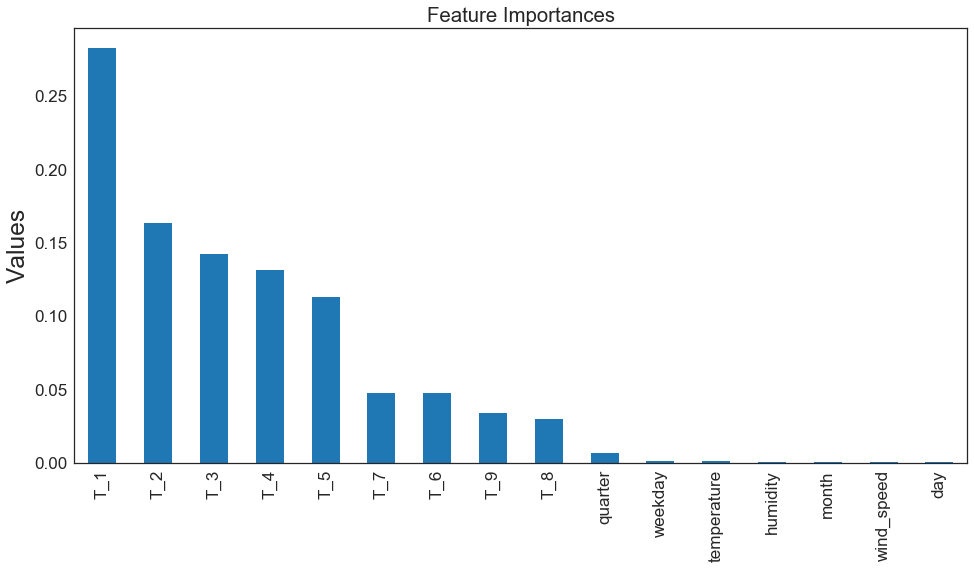

In [93]:
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False)
fi.head()
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

## Stacking Regressor
This combines multiple Regression Models via a meta-regressor. The indivisuals Regression models are trained based on the complete training set, then the meta regressor is fitted based on the outputs of based models as features

Combining
1. Ridge Regression
2. Random Forest
3. Gradient Boosting
4. Neural Nets

Meta Regressor= Linear Regression

In [96]:
lr = LinearRegression(
    n_jobs = -1
)

rd = Ridge(
    alpha = 4.84
)

rf = RandomForestRegressor(
    n_estimators = 12,
    max_depth = 3,
    n_jobs = -1
)

gb = GradientBoostingRegressor(
    n_estimators = 40,
    max_depth = 2
)

nn = MLPRegressor(
    hidden_layer_sizes = (90, 90),
    alpha = 2.75
)

In [97]:
from mlxtend.regressor import StackingRegressor
# Initialize Ensemble
model_stack = StackingRegressor(
    regressors=[rf, gb, nn, rd],
    meta_regressor=lr
)

# Fit the model on our data
model_stack.fit(X_train, y_train)

# Predict training set
model_pred = model_stack.predict(X_test)
print("Score on Training data : {:.2f}%".format(model_stack.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(model_stack.score(X_test, y_test) * 100))
print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - model_pred)**2))))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, model_pred)
print('MAE: %f' % mae)

Score on Training data : 99.43%
Score on Testing data : 99.36%
RMSE : 918.325
MAE: 693.258049
